In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, r2_score, accuracy_score, recall_score, \
precision_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

**step2:Data  Importing And Analysing**

In [2]:
df= pd.read_csv("mhealth_raw_data.csv")
df

alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [4]:
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [5]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [6]:
df.duplicated().sum() #number of duplicaated in dataframe rows

np.int64(0)

In [7]:

df.columns= df.columns.str.strip().str.lower().str.replace(" ","_")

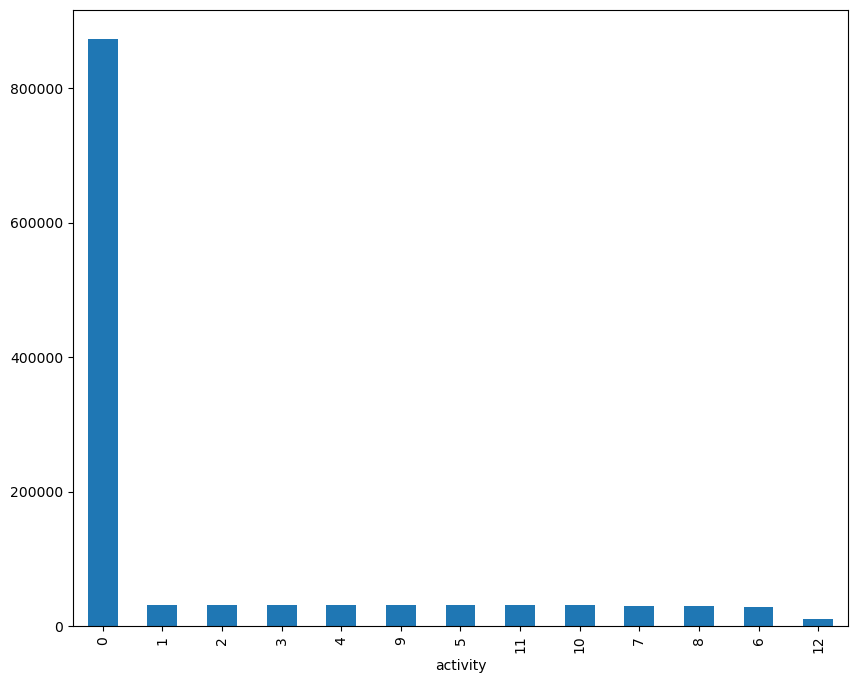

In [8]:
plt.figure(figsize=(10,8))
df['activity'].value_counts().plot.bar()
plt.show()

In [9]:
data_activity_0 = df[df['activity'] ==0]
data_activity_else = df[df['activity'] !=0]

In [10]:
data_actvity_0_sampled = data_activity_0.sample(n=40000)
df = pd.concat([data_actvity_0_sampled ,data_activity_else])

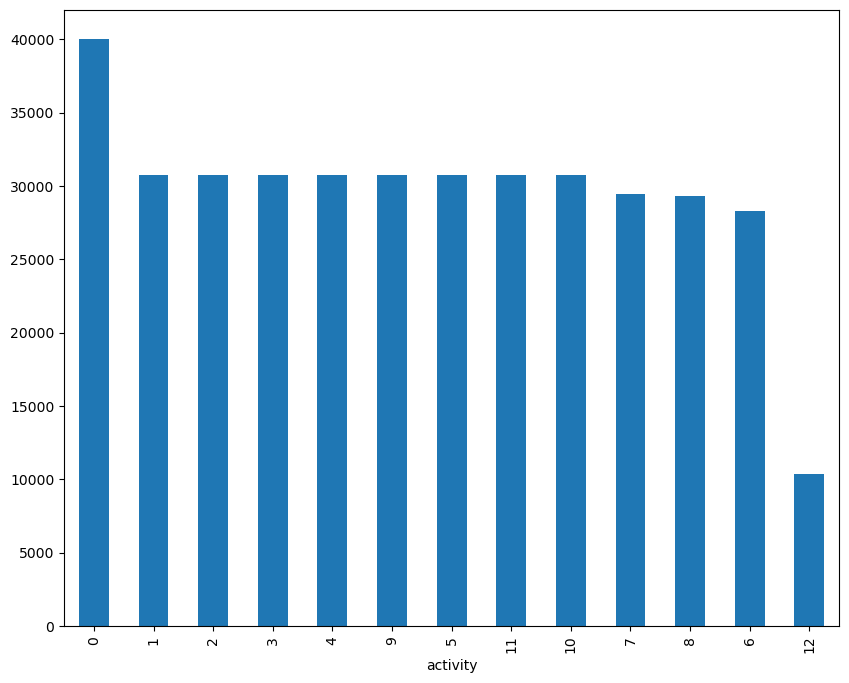

In [11]:
plt.figure(figsize=(10,8))
df['activity'].value_counts().plot.bar()
plt.show()

In [12]:
len(df)

383195

**step3:EDA**

In [13]:
activity_label = {                                    
1: "Standing still (1 min)",
2: "Sitting and relaxing (1 min)",
3:"Lying down (1 min)",
4: "Walking (1 min)",
5: "Climbing stairs (1 min)",
6: "Waist bends forward (20x)",
7: "Frontal elevation of arms (20x)",
8: "Knees bending (crouching) (20x)",
9: "Cycling (1 min)",
10: "Jogging (1 min)",
11: "Running (1 min)",
12: "Jump front & back (20x)"
}

=====================Standing still (1 min) - a=====================


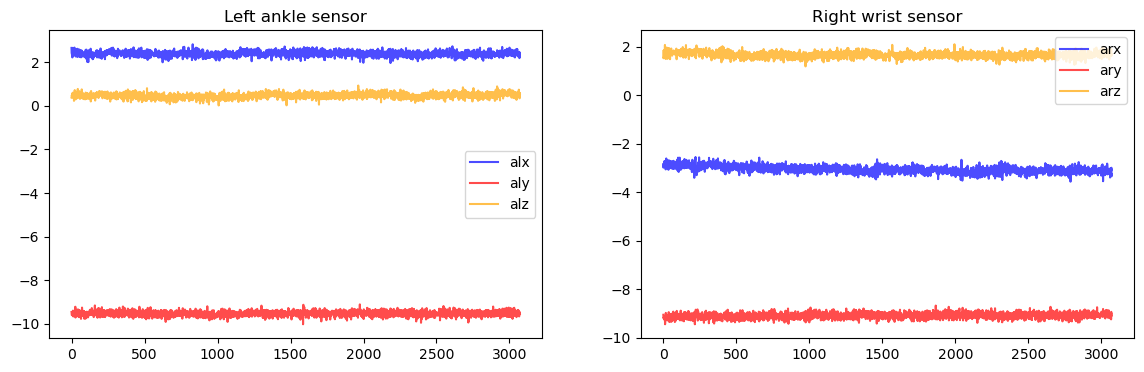

=====================Standing still (1 min) - g=====================


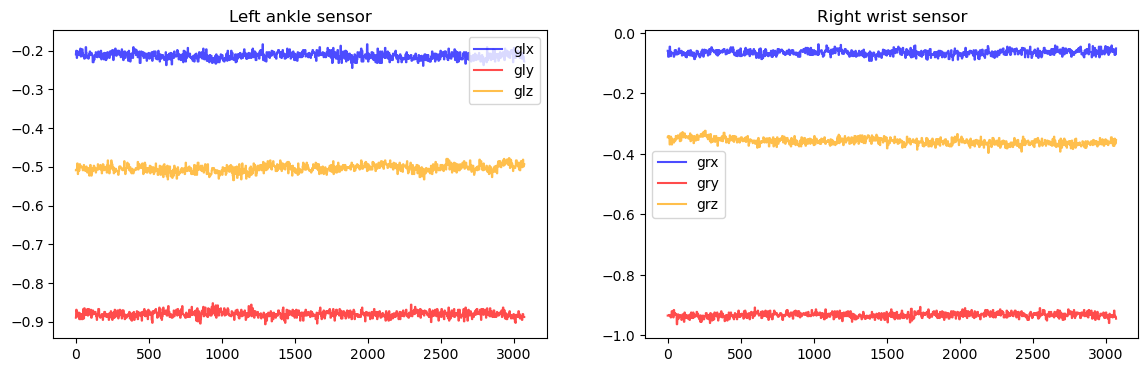

=====================Sitting and relaxing (1 min) - a=====================


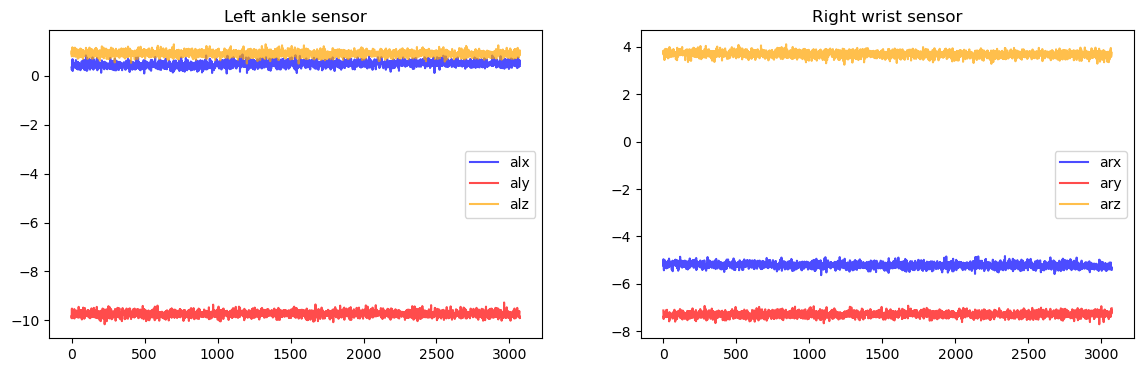

=====================Sitting and relaxing (1 min) - g=====================


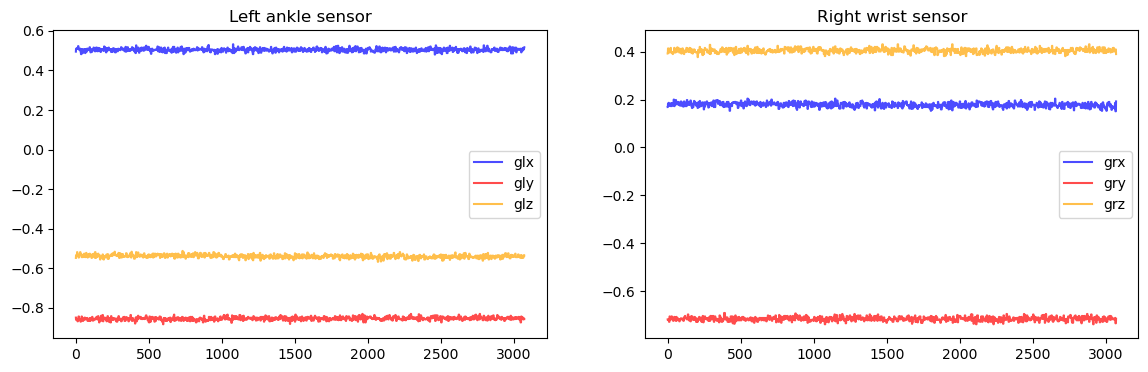

=====================Lying down (1 min) - a=====================


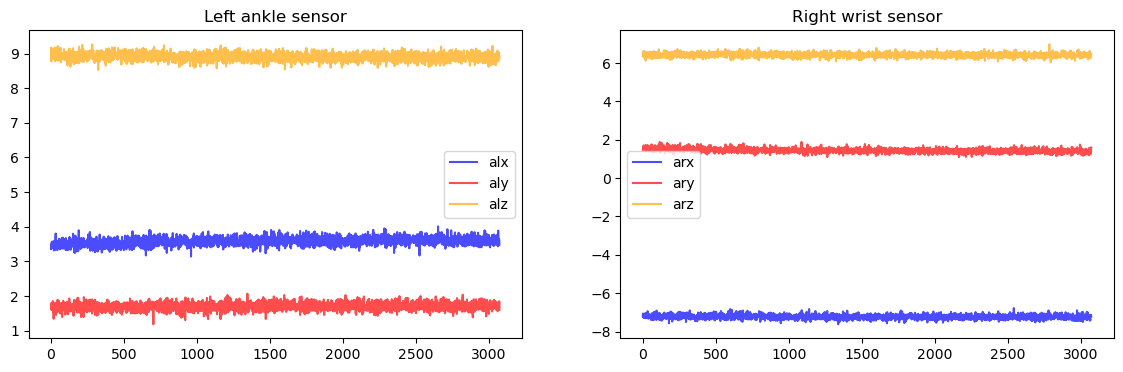

=====================Lying down (1 min) - g=====================


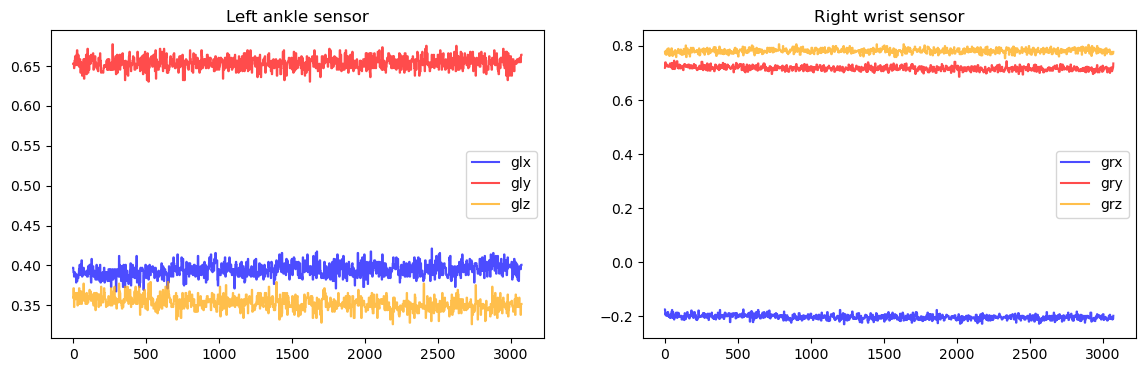

=====================Walking (1 min) - a=====================


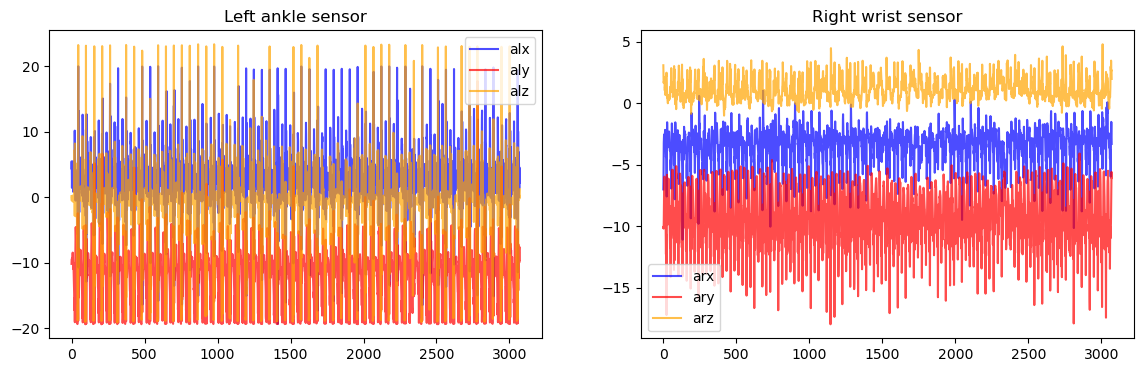

=====================Walking (1 min) - g=====================


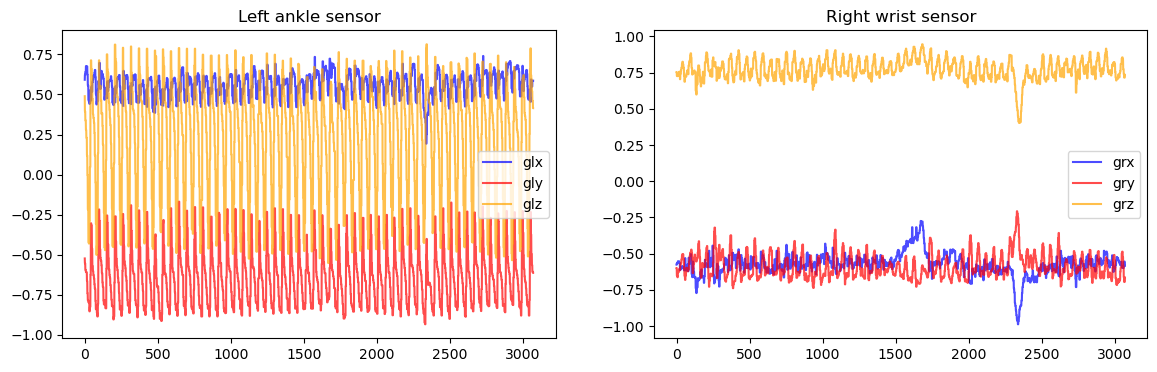

=====================Climbing stairs (1 min) - a=====================


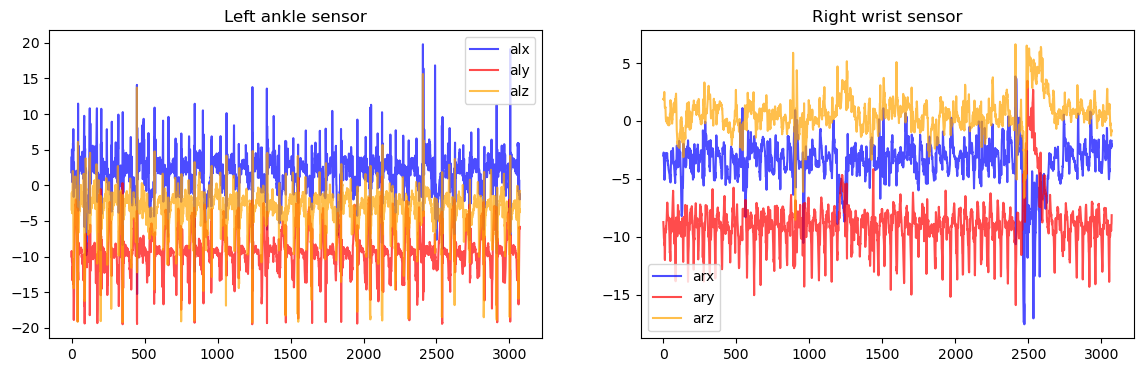

=====================Climbing stairs (1 min) - g=====================


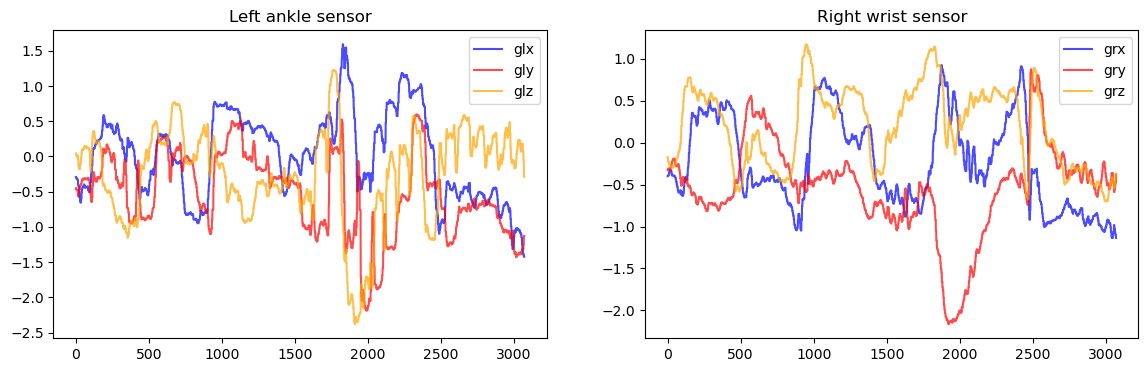

=====================Waist bends forward (20x) - a=====================


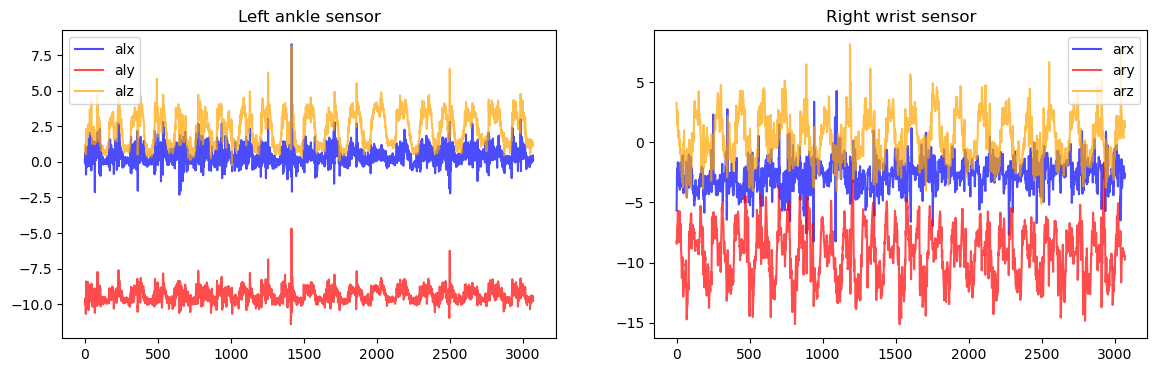

=====================Waist bends forward (20x) - g=====================


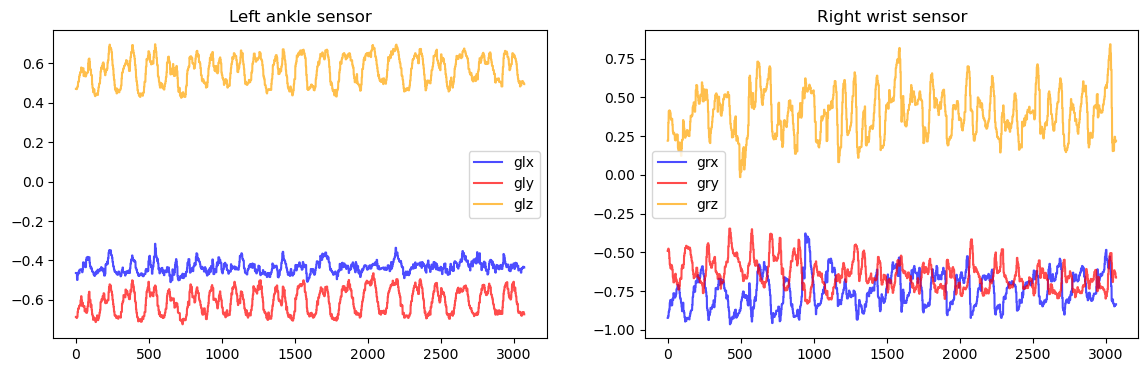

=====================Frontal elevation of arms (20x) - a=====================


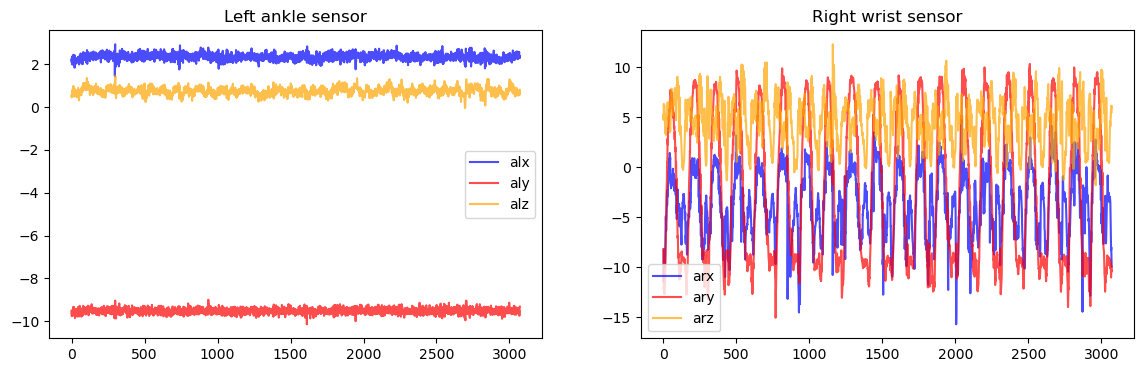

=====================Frontal elevation of arms (20x) - g=====================


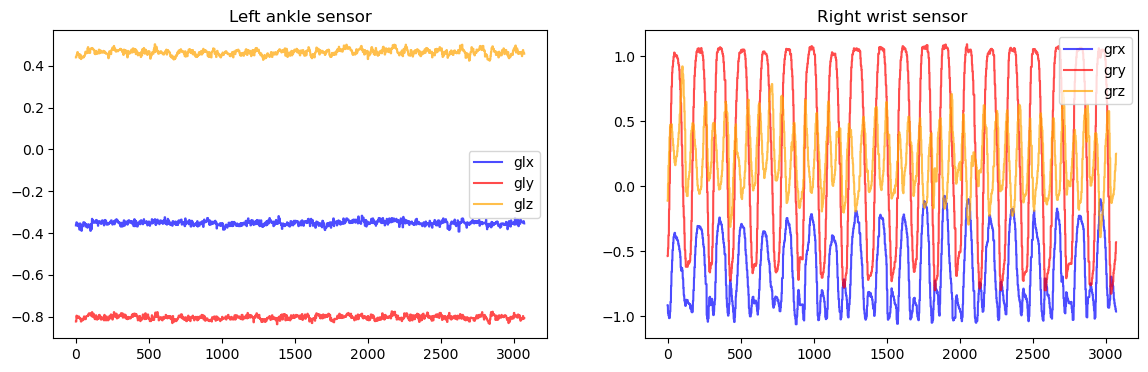

=====================Knees bending (crouching) (20x) - a=====================


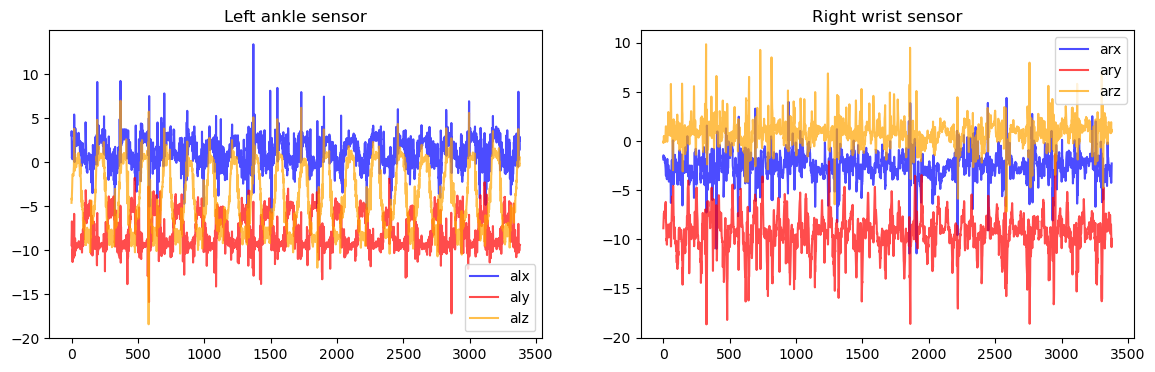

=====================Knees bending (crouching) (20x) - g=====================


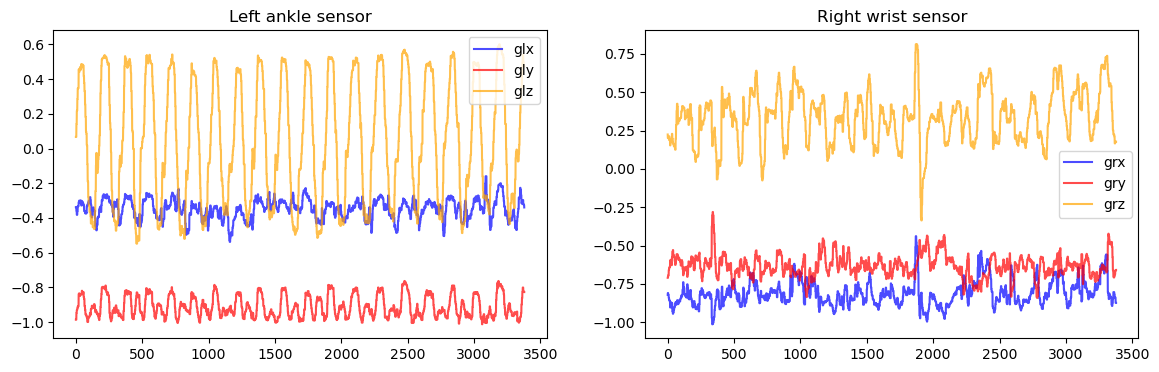

=====================Cycling (1 min) - a=====================


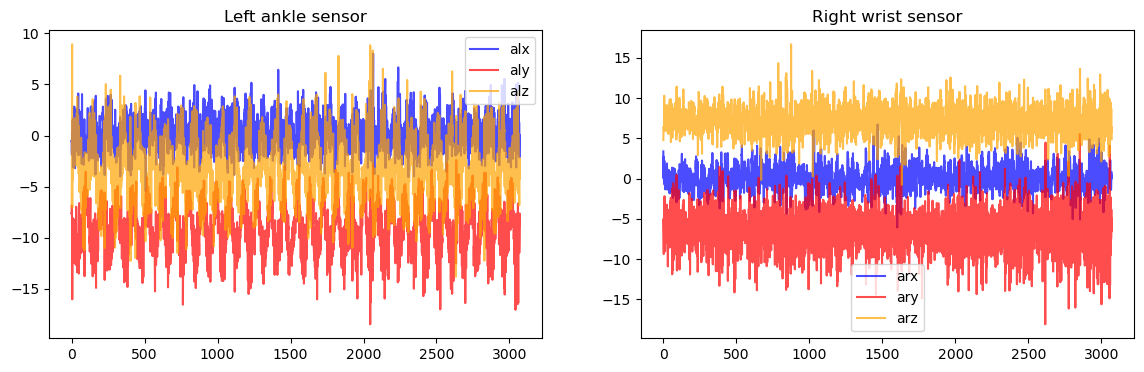

=====================Cycling (1 min) - g=====================


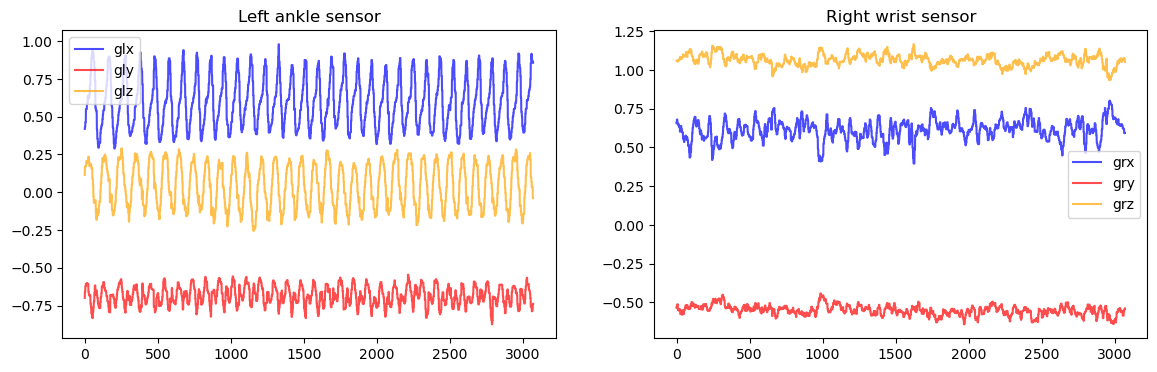

=====================Jogging (1 min) - a=====================


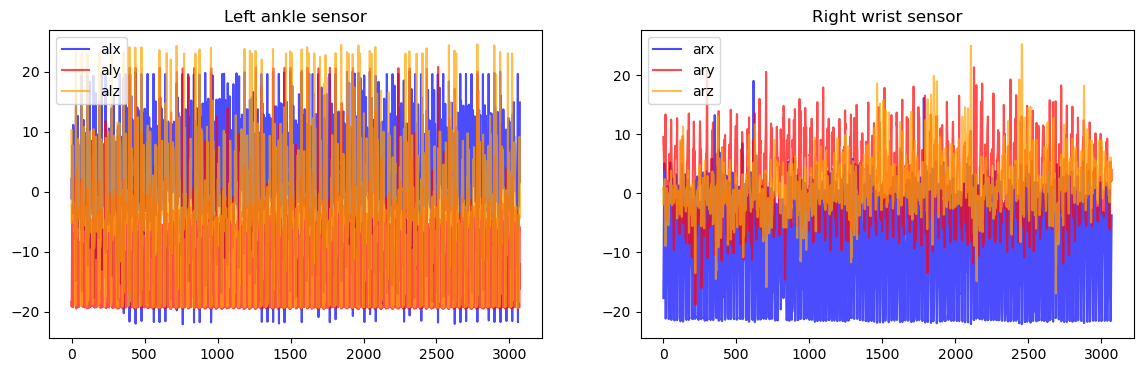

=====================Jogging (1 min) - g=====================


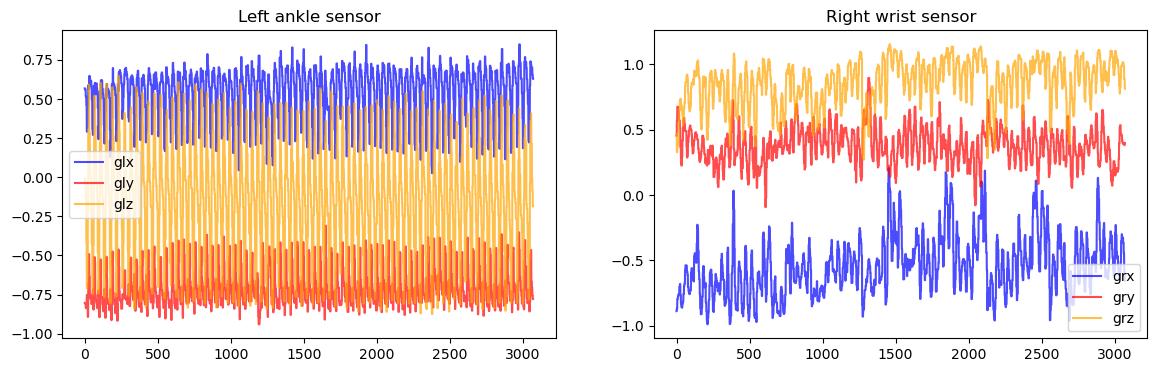

=====================Running (1 min) - a=====================


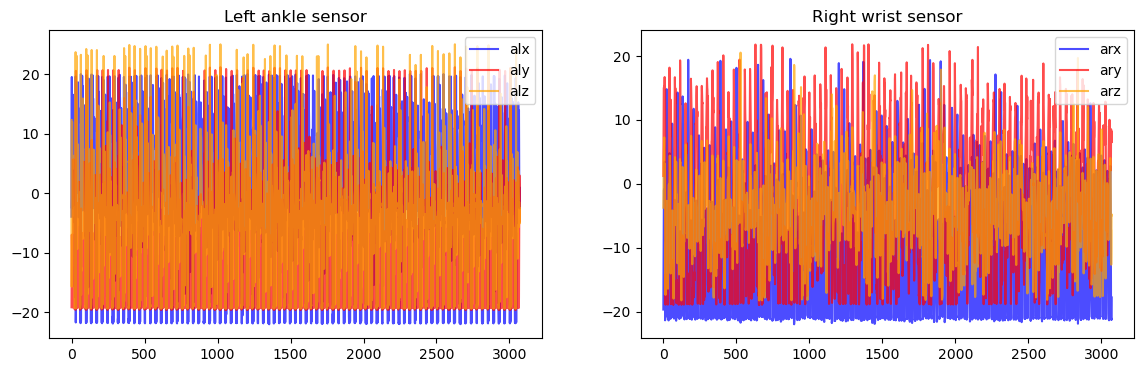

=====================Running (1 min) - g=====================


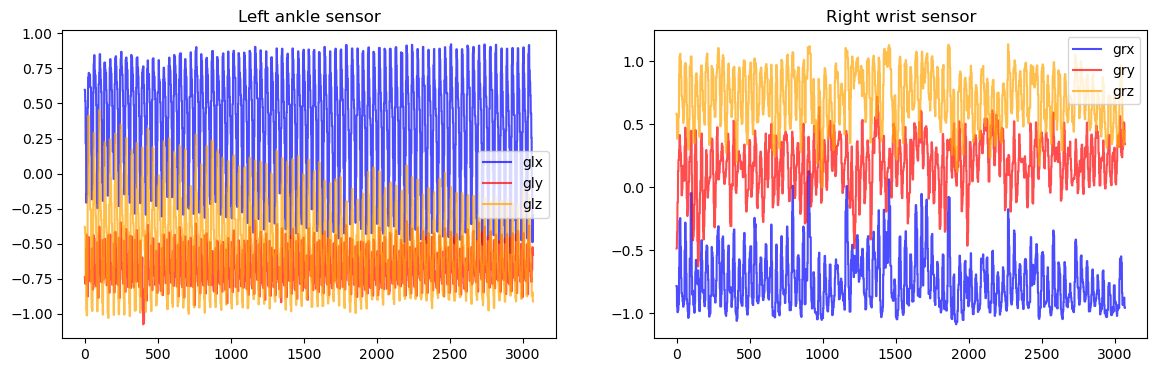

=====================Jump front & back (20x) - a=====================


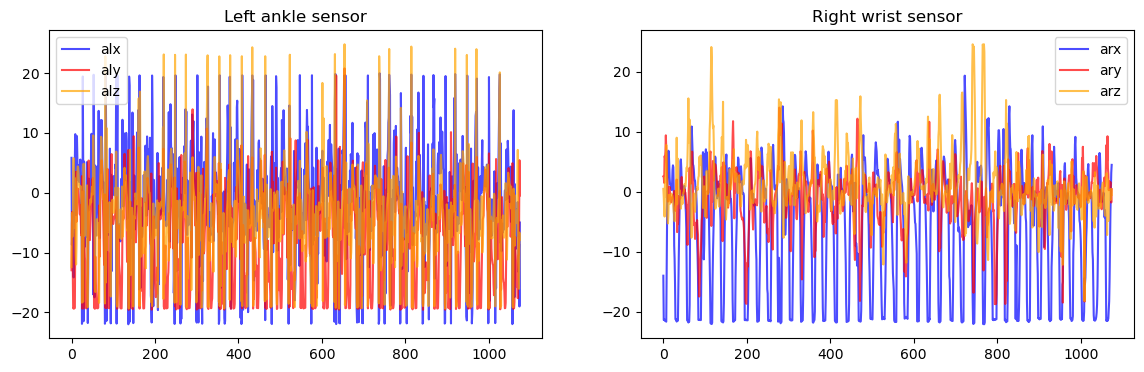

=====================Jump front & back (20x) - g=====================


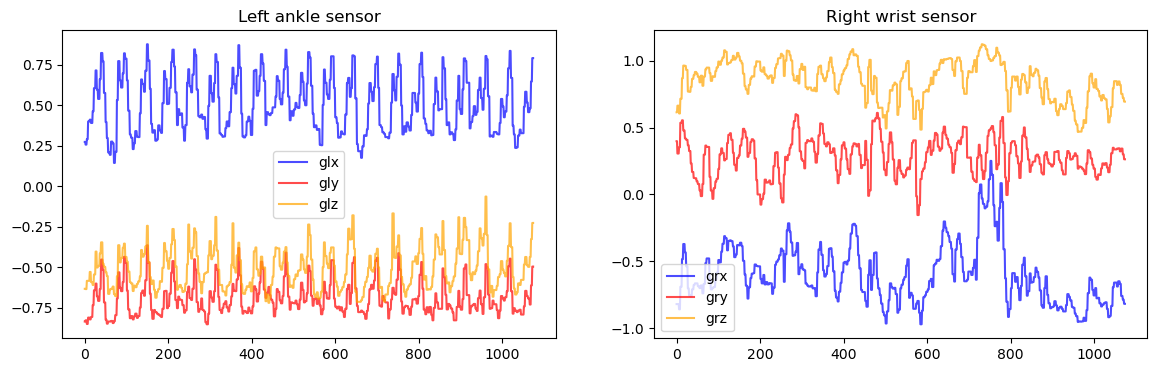

In [14]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1, 13):
    for r in readings:
        print(f"====================={activity_label[i]} - {r}=====================")
        plt.figure(figsize=(14,4))
        
        # Left ankle sensor
        plt.subplot(1, 2, 1)          # there will be hist which is another type of graph
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "lx"],
                 color='blue', alpha=0.7, label=r + "lx")
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "ly"],
                 color='red', alpha=0.7, label=r + "ly")
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "lz"],
                 color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        # Right wrist sensor
        plt.subplot(1, 2, 2)
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "rx"],
                 color='blue', alpha=0.7, label=r + "rx")
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "ry"],
                 color='red', alpha=0.7, label=r + "ry")
        plt.plot(subject1[subject1['activity'] == i].reset_index(drop=True)[r + "rz"],
                 color='orange', alpha=0.7, label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        
        plt.show()


In [15]:
df['activity']=df['activity'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13],["none","Standing still (1 min)",
                                                                   "Sitting and relaxing (1 min)",
                                                                   "Lying down (1 min)",
                                                                   "Walking (1 min)",
                                                                   "Climbing stairs (1 min)",
                                                                   "Waist bends forward (20x)",
                                                                   "Frontal elevation of arms (20x)",
                                                                   "Knees bending (crouching) (20x)",
                                                                   "Cycling (1 min)",
                                                                   "Jogging (1 min)",
                                                                   "Running (1 min)",
                                                                   "Jump front & back (20x)"])


In [16]:
df['activity']

180283                   0
292211                   0
532413                   0
674994                   0
1070712                  0
                ...       
1213641    Running (1 min)
1213642    Running (1 min)
1213643    Running (1 min)
1213644    Running (1 min)
1213645    Running (1 min)
Name: activity, Length: 383195, dtype: object

In [17]:
df.activity.value_counts()

activity
0                                  40000
none                               30720
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Knees bending (crouching) (20x)    30720
Walking (1 min)                    30720
Jogging (1 min)                    30720
Cycling (1 min)                    30720
Waist bends forward (20x)          29441
Frontal elevation of arms (20x)    29337
Climbing stairs (1 min)            28315
Running (1 min)                    10342
Name: count, dtype: int64

<Axes: ylabel='count'>

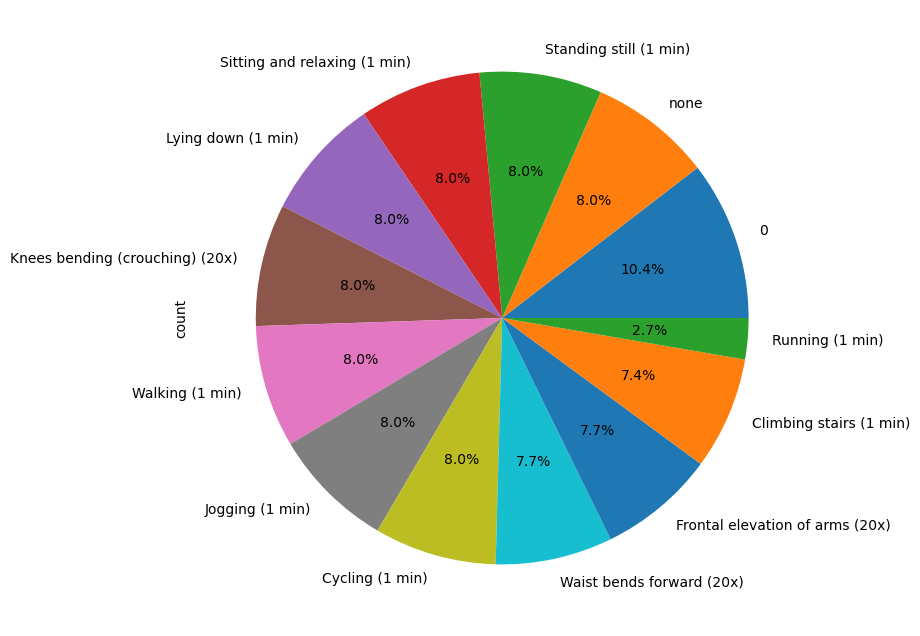

In [18]:
plt.figure(figsize=(12,8))
round(df['activity'].value_counts()/df.shape[0]*100,2).plot.pie(autopct ='%2.1f%%')

In [19]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df1[feature], 0.01)
    upper_range = np.quantile(df1[feature], 0.99)
    print(feature, "range:", lower_range, 'to', upper_range)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)
    print('shape', df1.shape)


alx range: -11.51412 to 19.223
shape (375547, 14)
aly range: -19.365 to 1.823353999999998
shape (368071, 14)
alz range: -18.606 to 11.857
shape (360713, 14)
glx range: -0.75881 to 0.80148
shape (353630, 14)
gly range: -1.0394 to 0.96811
shape (346623, 14)
glz range: -1.0982 to 0.82711
shape (339978, 14)
arx range: -21.465 to 6.826122999999998
shape (333193, 14)
ary range: -18.681 to 10.833160000000033
shape (326531, 14)
arz range: -6.41118 to 10.306400000000023
shape (319999, 14)
grx range: -1.0059 to 0.89412
shape (313755, 14)
gry range: -1.1253 to 0.92402
shape (307582, 14)
grz range: -0.66379 to 1.1164
shape (301588, 14)


In [20]:
df1


alx       aly        alz      glx      gly       glz       arx  \
292211  -0.35826  -9.73870   1.374100  0.56215 -0.83302  0.086444  -9.88900   
674994   1.41160  -9.30410   2.267700 -0.15955 -0.89681 -0.461690  -4.00940   
250098   0.31335  -9.81090   0.095921 -0.61039 -0.77298 -0.188610  -5.65870   
497267   0.24987  -9.57290   1.128000 -0.53989 -0.79550 -0.347740  -0.56452   
612727   2.87080 -12.27800 -11.929000 -0.64750 -0.68856 -0.528490 -14.41300   
...          ...       ...        ...      ...      ...       ...       ...   
1213636 -0.19979  -0.93484   2.555400  0.63080 -0.52533 -0.679760  -4.02120   
1213637 -0.33315  -1.23710  -2.919400  0.63822 -0.42777 -0.748530  -2.25150   
1213640  6.77570 -15.07500   7.397400  0.61967 -0.33771 -0.827110  -2.27970   
1213641 -2.48730 -19.23300   3.461400  0.61967 -0.33771 -0.827110  -8.23480   
1213645 -2.36980 -19.30000  -4.238700  0.71058 -0.27017 -0.754420 -21.17300   

               ary      arz       grx      gry       grz         activity  \
292211    1.567800  1.77630 -0.727450 -0.25462  0.810340                0   
674994   -6.900500  0.94664 -0.201960 -0.87064 -0.586210                0   
250098   -7.369200  2.07950 -0.341180 -0.94867 -0.484910                0   
497267   -9.417100  1.28960 -0.092157 -0.95483 -0.482760                0   
612727   -8.640200  8.98470 -0.870590 -0.66530  0.234910                0   
...            ...      ...       ...      ...       ...              ...   
1213636  -0.082645  0.73545 -0.458820 -1.00000  0.122840  Running (1 min)   
1213637  -0.414790  0.52093 -0.417650 -1.03700  0.088362  Running (1 min)   
1213640  -2.358900  2.11120 -0.417650 -1.03700  0.088362  Running (1 min)   
1213641  -4.965200  2.48090 -0.437250 -1.01850  0.079741  Running (1 min)   
1213645 -14.291000 -0.13123 -0.425490 -1.03700  0.084052  Running (1 min)   

           subject  
292211    subject3  
674994    subject6  
250098    subject2  
497267    subject4  
612727    subject5  
...            ...  
1213636  subject10  
1213637  subject10  
1213640  subject10  
1213641  subject10  
1213645  subject10  

[301588 rows x 14 columns]

***step4:data processing***

In [21]:
le = LabelEncoder()
df['subject']= le.fit_transform(df['subject'])

In [22]:
df['activity'].apply(type).value_counts()

activity
<class 'str'>    343195
<class 'int'>     40000
Name: count, dtype: int64

In [23]:
df['activity'] = df['activity'].astype(str)
df['activity'] = le.fit_transform(df['activity'])


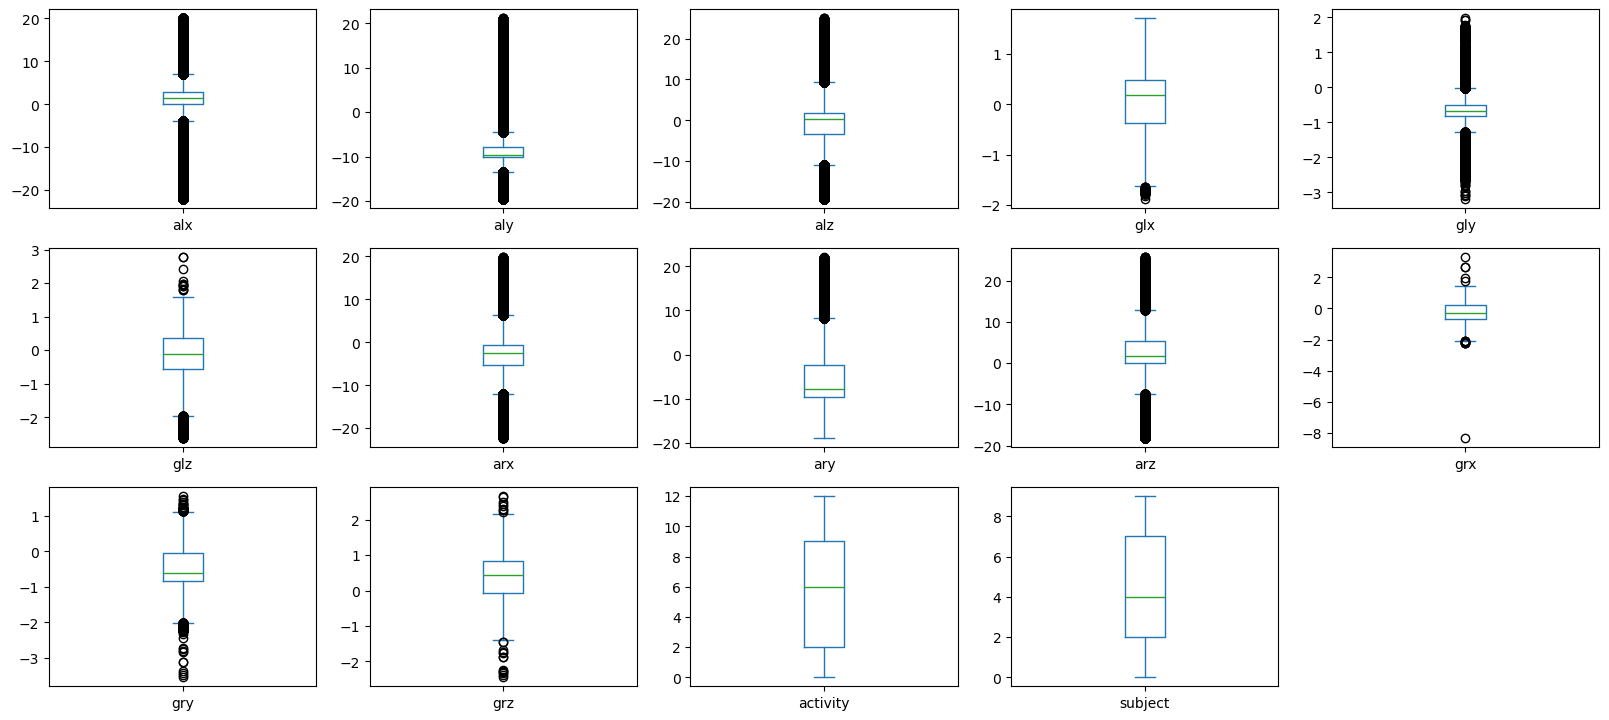

In [24]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,15))
plt.show()

In [25]:
X=df.drop(["activity","subject"],axis=1).values
y=df['activity'].values

In [26]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [27]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

**step5:building model**

In [47]:
def resultsSummarizer(y_true, y_pred, cm_en=True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = sensitivity = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    if cm_en:
        plt.figure(figsize=(15,15))

   
        sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels=activity_label.values(),
                yticklabels=activity_label.values())

        plt.title('Confusion Matrix')
        plt.show()

    print('Accuracy Score: ' + '{:.4%}'.format(acc))
    print('Precision Score: ' + '{:.4%}'.format(prec))
    print('Recall Score: ' + '{:.4%}'.format(rec))
    print('F1 Score: ' + '{:.4%}'.format(f1))

**1:Logistic Regression**

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\sanje\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.score(X_train, y_train)

0.5457174073403944

In [31]:
lr.score(X_test, y_test)

0.5433042098560528

In [32]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)

C:\Users\sanje\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr2.score(X_train_scaled, y_train)

0.5536367938315078

In [34]:
lr2.score(X_test_scaled, y_test)

0.55121660977672

In [35]:
y_pred_lr = lr2.predict(X_test_scaled)

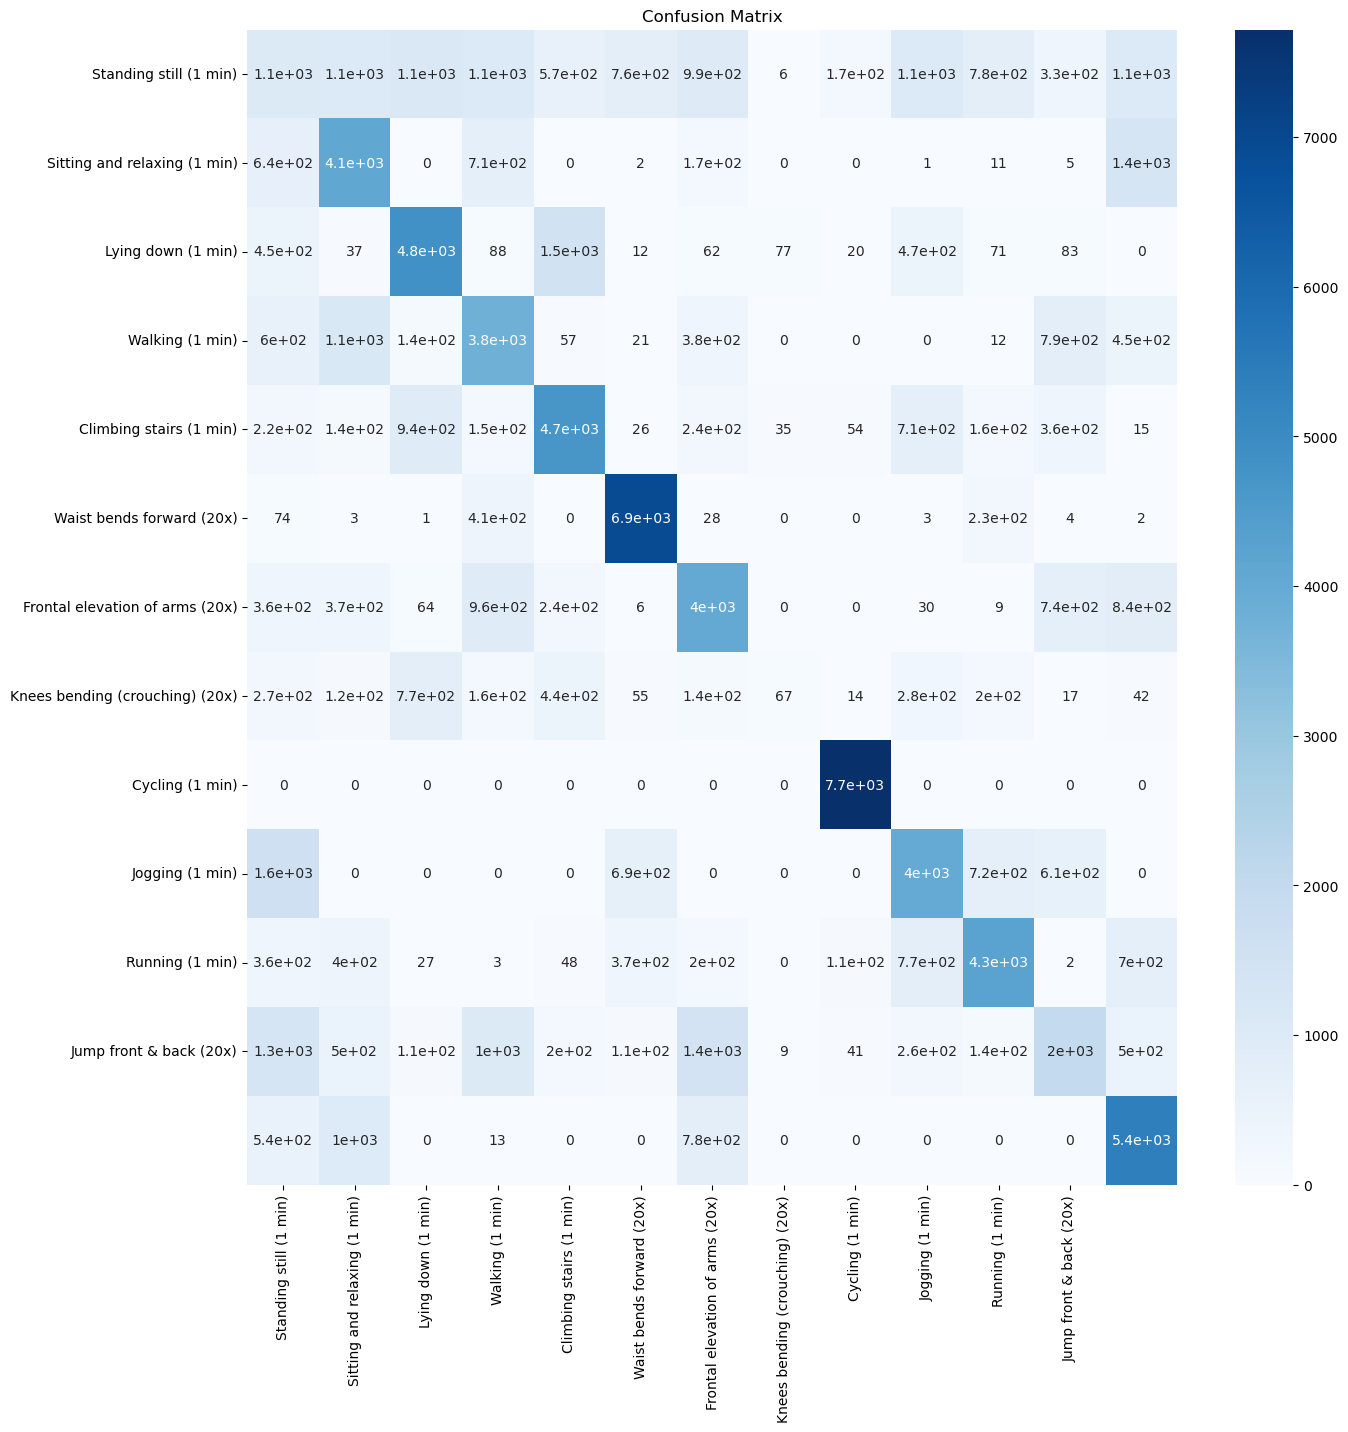

Accuracy Score: 55.1217%
Precision Score: 53.0318%
Recall Score: 53.4994%
F1 Score: 51.8282%


In [36]:
resultsSummarizer(y_test, y_pred_lr)

***KNN***

In [37]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn1.predict(X_test)

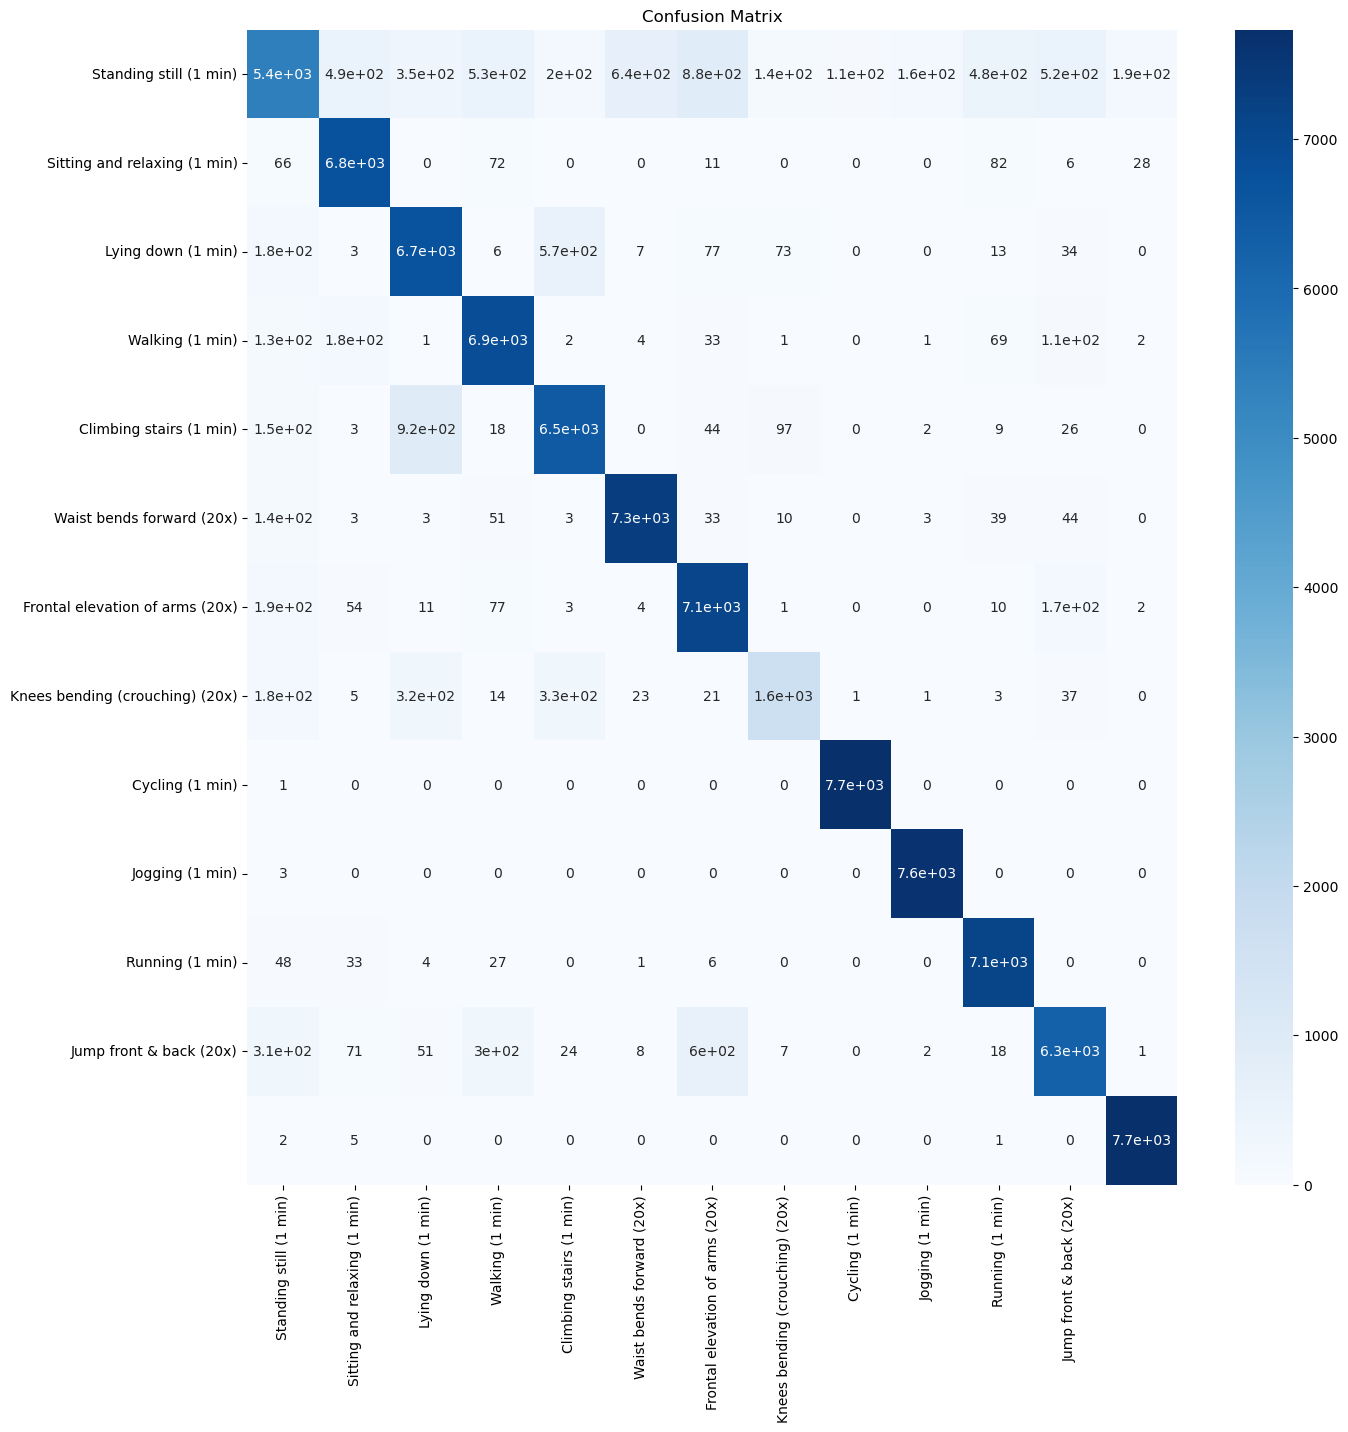

Accuracy Score: 88.4811%
Precision Score: 88.1803%
Recall Score: 88.1549%
F1 Score: 87.7811%


In [39]:
resultsSummarizer(y_test, y_pred_knn)


In [41]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)

In [48]:
resultsSummarizer(y_test, y_pred_knn2, cm_en=False)

Accuracy Score: 93.7901%
Precision Score: 93.6701%
Recall Score: 93.5011%
F1 Score: 93.2499%


In [49]:
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"\n=========== No of Neighbors: {n} ===========\n")
    resultsSummarizer(y_test, y_pred, cm_en=False)


=========== No of Neighbors: 1 ===========

Accuracy Score: 93.9958%
Precision Score: 93.7536%
Recall Score: 93.8382%
F1 Score: 93.6930%

=========== No of Neighbors: 2 ===========

Accuracy Score: 92.9070%
Precision Score: 93.4063%
Recall Score: 92.0394%
F1 Score: 92.5170%

=========== No of Neighbors: 3 ===========

Accuracy Score: 94.2129%
Precision Score: 94.0507%
Recall Score: 93.9934%
F1 Score: 93.7814%

=========== No of Neighbors: 4 ===========

Accuracy Score: 93.9916%
Precision Score: 93.9015%
Recall Score: 93.5262%
F1 Score: 93.4414%

=========== No of Neighbors: 5 ===========

Accuracy Score: 93.7901%
Precision Score: 93.6701%
Recall Score: 93.5011%
F1 Score: 93.2499%

=========== No of Neighbors: 6 ===========

Accuracy Score: 93.6983%
Precision Score: 93.6142%
Recall Score: 93.3086%
F1 Score: 93.1280%

=========== No of Neighbors: 7 ===========

Accuracy Score: 93.4603%
Precision Score: 93.3671%
Recall Score: 93.1739%
F1 Score: 92.8770%

=========== No of Neighbors: 8 ==

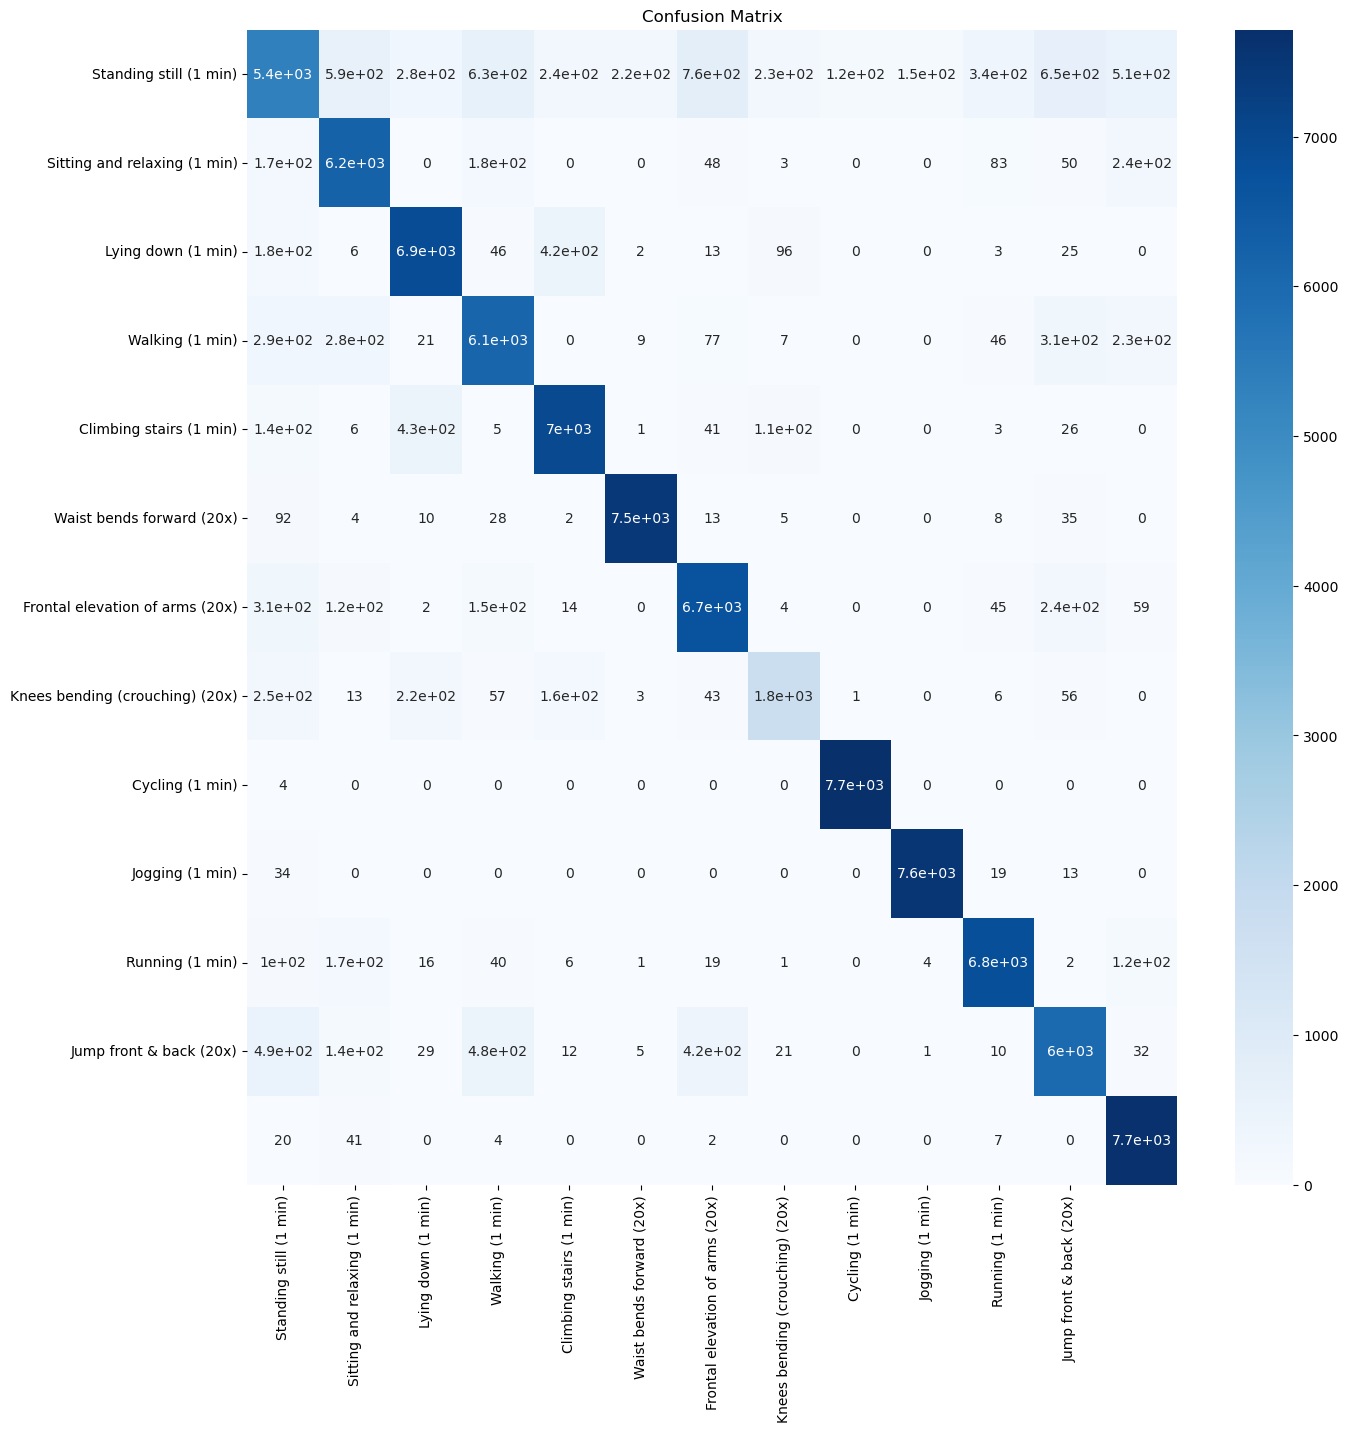

Accuracy Score: 86.9132%
Precision Score: 86.4288%
Recall Score: 86.8119%
F1 Score: 86.4289%


In [50]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

resultsSummarizer(y_test, y_pred_dt)